## Basics of Probability Distributions

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


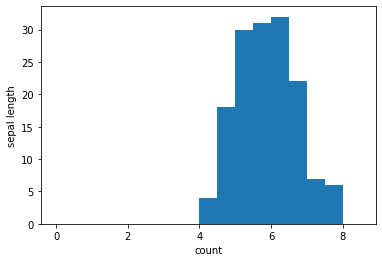

In [9]:
# read dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')

def histo():
    # create histogram
    bin_edges = np.arange(0, df['sepal_length'].max() + 1, 0.5)
    fig = plt.hist(df['sepal_length'], bins=bin_edges)

    # add plot labels
    plt.xlabel('count')
    plt.ylabel('sepal length')
    
    
histo()
plt.show()

### Sample Mean:

$$\bar{x} = \frac{1}{n}\sum_{i=1}^n  x_i$$

In [10]:
x = df['sepal_length'].values
sum(i for i in x) / len(x)
x_mean = np.mean(x)
x_mean

5.843333333333334

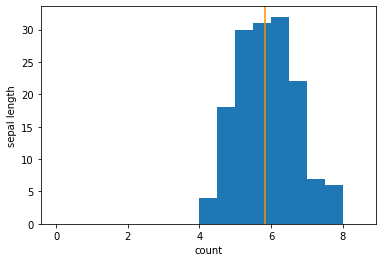

In [11]:
histo()
plt.axvline(x_mean, color='darkorange')
plt.show()

### Sample Variance:

$$Var_x = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

In [12]:
sum([(i - x_mean)**2 for i in x]) / (len(x) - 1)

0.6856935123042504

In [13]:
var = np.var(x, ddof=1)
var

0.6856935123042507

In [14]:
df['sepal_length'].var()

0.6856935123042505

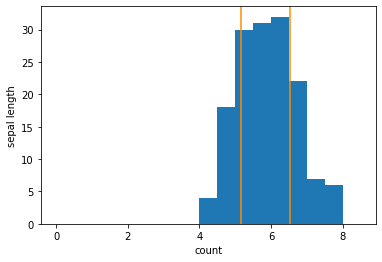

In [15]:
histo()
plt.axvline(x_mean + var, color='darkorange')
plt.axvline(x_mean - var, color='darkorange')
plt.show()

### Sample Standard Deviation:

$$Std_x = \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}}$$

In [16]:
(sum([(i - x_mean)**2 for i in x]) / (len(x) - 1))**0.5

0.8280661279778628

In [17]:
np.sqrt(np.var(x, ddof=1))

0.828066127977863

In [18]:
std = np.std(x, ddof=1)
std

0.828066127977863

In [19]:
df['sepal_length'].std()

0.8280661279778629

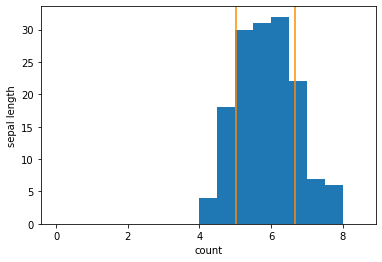

In [20]:
histo()
plt.axvline(x_mean + std, color='darkorange')
plt.axvline(x_mean - std, color='darkorange')
plt.show()

## Mode

In [21]:
lst = list(x)
mode = max(set(lst), key=lst.count)
mode

5.0

### 25th and 75th Percentile:

In [22]:
y = np.sort(x)
percentile_25th = y[round(0.25 * y.shape[0]) + 1]
percentile_25th

5.1

In [23]:
percentile_75th = y[round(0.75 * y.shape[0]) - 1]
percentile_75th

6.4

In [24]:
np.percentile(x, q=[25, 75], interpolation='lower')

array([5.1, 6.4])

In [25]:
df['sepal_length'].quantile(0.25, interpolation='lower')

5.1

In [26]:
df['sepal_length'].quantile(0.75, interpolation='lower')

6.4

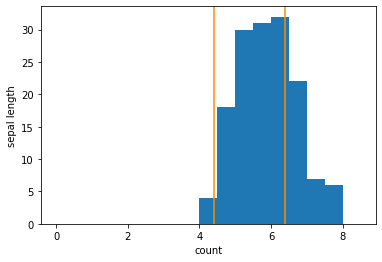

In [27]:
histo()
plt.axvline(percentile_75th, color='darkorange')
plt.axvline(percentile_25th - var, color='darkorange')
plt.show()

## Median (50th Percentile):

In [28]:
x = np.sort(x)

tmp = round(0.5 * x.shape[0])

if x.shape[0] % 2:
    median = x[tmp - 1]
else:
    median = x[tmp - 1] + (x[tmp] - x[tmp - 1]) / 2.
    
median

5.8

In [29]:
np.median(x)

5.8

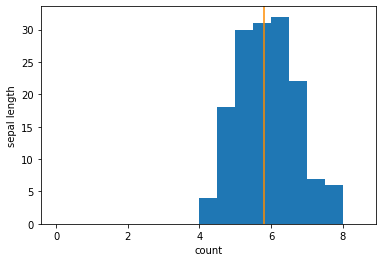

In [30]:
histo()
plt.axvline(median, color='darkorange')
plt.show()